In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
os.chdir('/Users/aarsh/Documents/Applied Machine Learning/DataSets/rossmann-store-sales')

In [30]:
df=pd.read_csv('store.csv')
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [31]:
df1=pd.read_csv('train.csv')
df1.head()


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [155]:
data=pd.merge(df,df1,on="Store")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [156]:
#changes withtin the data

data.loc[data.CompetitionOpenSinceMonth.isnull(),"CompetitionOpenSinceMonth"]=data["CompetitionOpenSinceMonth"].mean()
data.loc[data.CompetitionOpenSinceYear.isnull(),"CompetitionOpenSinceYear"]=data["CompetitionOpenSinceYear"].mean()
data=data[data["Open"]==1]
#adding new columns

data["Month"]=pd.to_datetime(data["Date"]).dt.month
data["Year"]=pd.to_datetime(data["Date"]).dt.year
data['SH'] = data.StateHoliday.map( {'a': 1, 'b': 2, 'c': 3, '0': 0, 0:0} ).astype('category')
data['SType'] = data.StoreType.map( {'a': 1, 'b': 2, 'c': 3, 'd': 4} ).astype(int)
data['AS'] = data.Assortment.map( {'a': 1, 'b': 2, 'c': 3, 'd': 4} ).astype(int)
data["SchHoliday"]=data["SchoolHoliday"].astype('category')
data["Sales1"]=data["Sales"].astype('float')
data=data.fillna(0)
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Promo,StateHoliday,SchoolHoliday,Month,Year,SH,SType,AS,SchHoliday,Sales1
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,0,1,7,2015,0,3,1,1,5263.0
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,0,1,7,2015,0,3,1,1,5020.0
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,0,1,7,2015,0,3,1,1,4782.0
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,0,1,7,2015,0,3,1,1,5011.0
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,0,1,7,2015,0,3,1,1,6102.0


In [157]:
#checking for duplicates
duplicates=data.duplicated()
if duplicates[1]==True:
    print(duplicates)

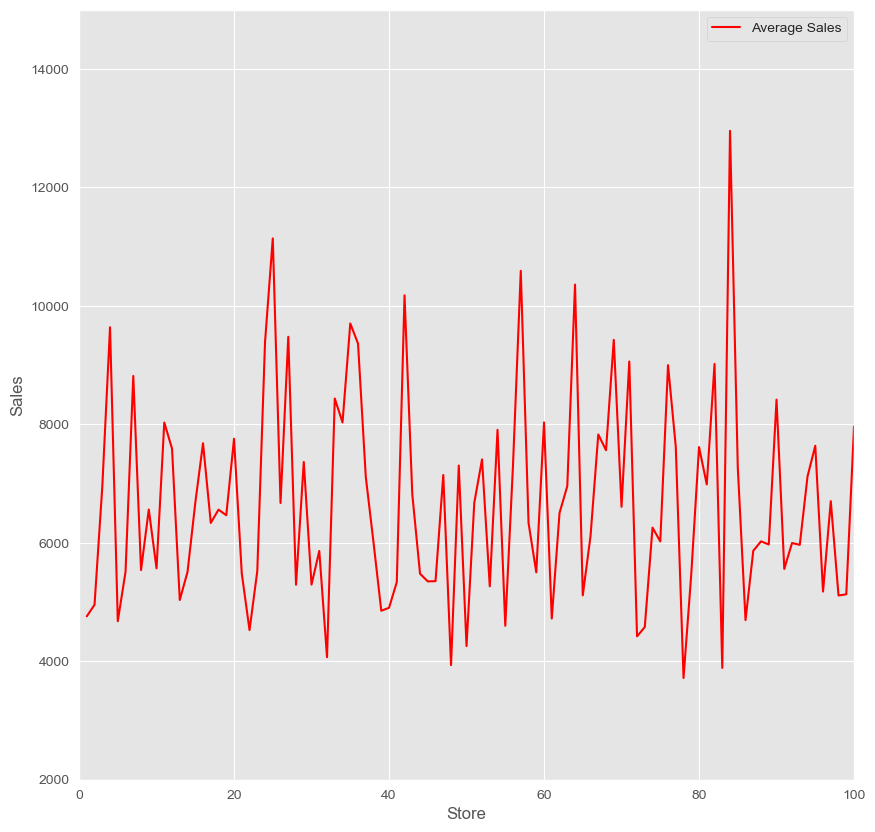

In [158]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
data.groupby("Store")["Sales"].mean().plot(xlim=(0,100),ylim=(2000,15000),legend=True,label="Average Sales",color='red')
plt.ylabel("Sales")
plt.show()

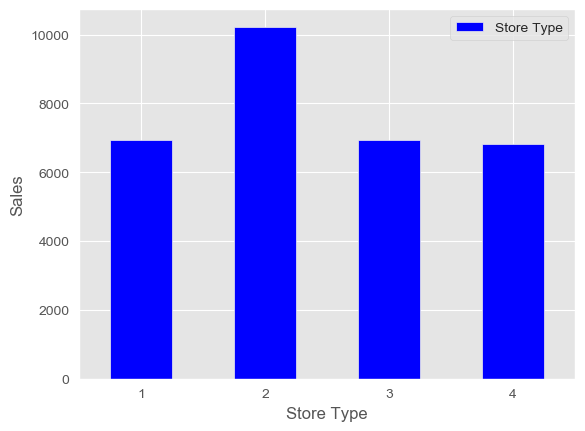

In [159]:
data.groupby("SType")["Sales"].mean().plot(kind='bar',color='blue',label="Store Type",legend=True,rot=360) 
plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.show()

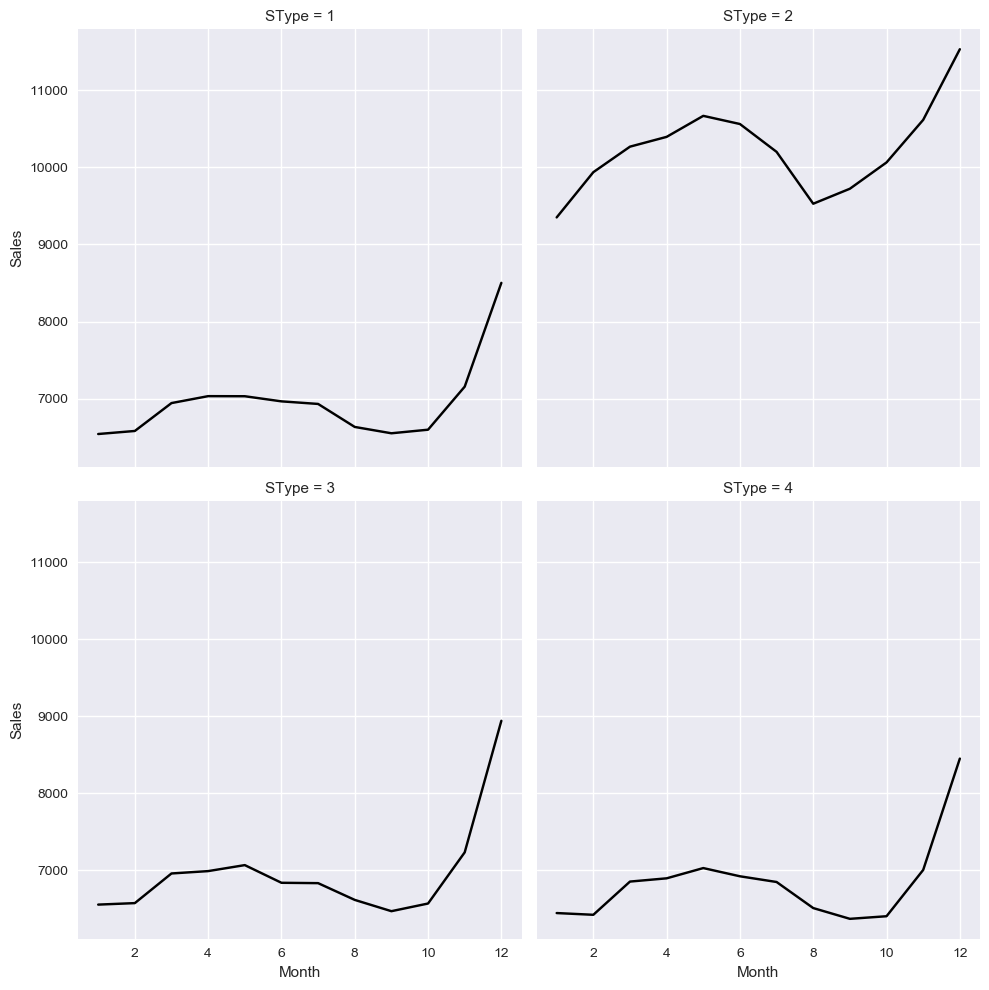

In [160]:
#using relplot i could use subplots
plt.style.use("seaborn")
Avg_sales=data.groupby(["Month","SType"])["Sales"].mean().reset_index()
sns.relplot(x="Month",y="Sales",data=Avg_sales,kind="line",col="SType",col_wrap=2,color='black')
plt.show()

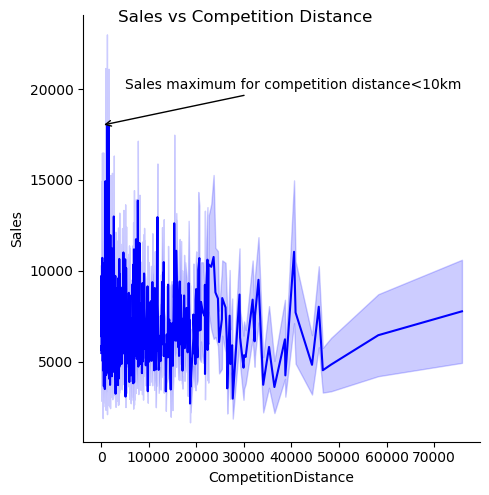

In [161]:
#here we have multiple observations per competition distance so this will display the mean of these values
#the CI shows that we can 95%confident that the average sales is within this range
#the ci parameter shows the spread of the observation for each x value(sd=standard deviation
plt.style.use("default")
g=sns.relplot(x="CompetitionDistance",y="Sales",kind="line",data=data,color='blue',ci="sd")
g.fig.suptitle("Sales vs Competition Distance")
plt.annotate(s="Sales maximum for competition distance<10km",xy=[0,18000],xytext=[5000,20000]
             ,arrowprops={"arrowstyle":'->'})
plt.show()

In [162]:
data.PromoInterval.value_counts()

0                   423307
Jan,Apr,Jul,Oct     242411
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: PromoInterval, dtype: int64

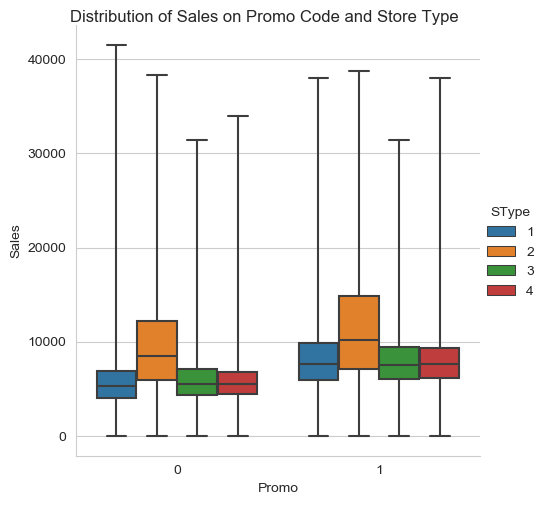

In [163]:
sns.set_style("whitegrid")
g=sns.catplot(x="Promo",y="Sales",kind="box",hue="SType",data=data,whis=[0,100])
g.fig.suptitle("Distribution of Sales on Promo Code and Store Type",y=1)
plt.show()

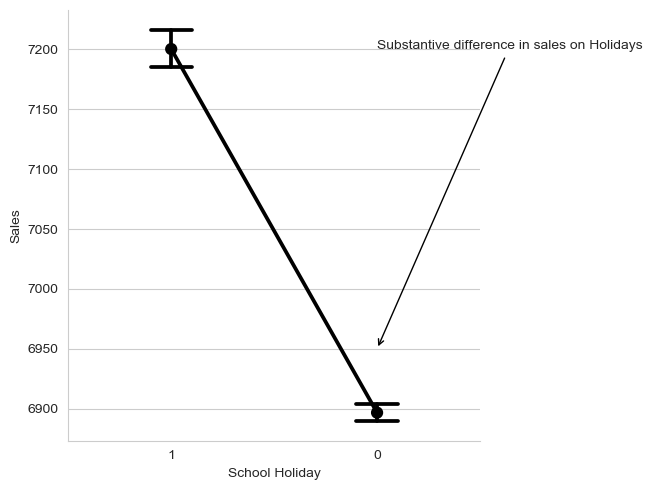

In [164]:
g=sns.catplot(x="SchHoliday",y="Sales",kind="point",capsize=0.2,data=data,order=[1,0],color="black")
g.set(xlabel="School Holiday")
plt.annotate(s="Substantive difference in sales on Holidays",xy=[1,6950],xytext=[1,7200]
             ,arrowprops={"arrowstyle":'->',"color":"black"})
plt.show()

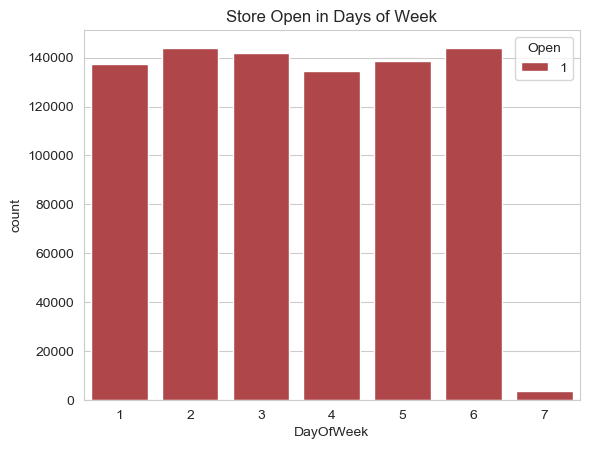

In [165]:
sns.set_palette("RdBu")
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = data)
plt.title('Store Open in Days of Week')
plt.show()

In [166]:
data.groupby('DayOfWeek')['Sales'].mean()


DayOfWeek
1    8216.073074
2    7088.113656
3    6728.122978
4    6767.310159
5    7072.677012
6    5874.840238
7    8224.723908
Name: Sales, dtype: float64

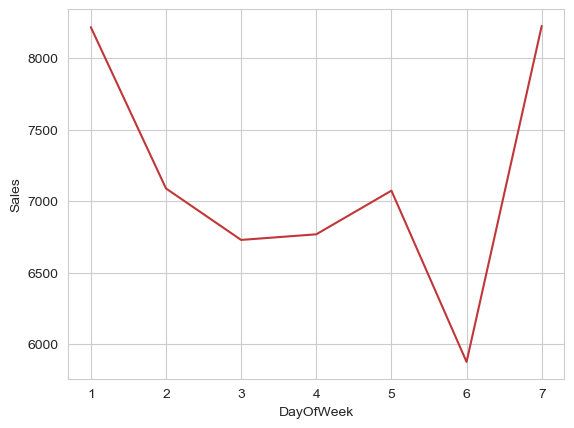

In [167]:
data.groupby('DayOfWeek')['Sales'].mean().plot(kind="line").set_ylabel("Sales")
plt.show()
#Here we see that although very few stores are open on sundays but the sale peaks on that day.

In [168]:
dk=data[data["SH"]==3]
k=dk["Store"].unique()
dm=data[data["SH"]==2]
n=dm["Store"].unique()
dl=data[data["SH"]==1]
m=dl["Store"].unique()

from functools import reduce
StoreOpenHoliday=reduce(np.intersect1d,(k,n,m))
print(StoreOpenHoliday)
#particular stores always open on all state holidays

[  85  259  262  274  299  335  353  423  494  512  530  562  676  682
  733  769  948 1081 1097 1099]


In [169]:
data.groupby("Year")["Sales"].mean()

Year
2013    6814.392025
2014    7025.404201
2015    7088.126648
Name: Sales, dtype: float64

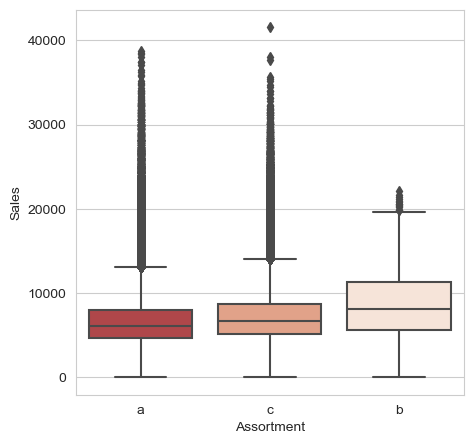

In [170]:
plt.figure(figsize=[5,5])
sns.boxplot(x="Assortment",y="Sales",data=data)
plt.show()

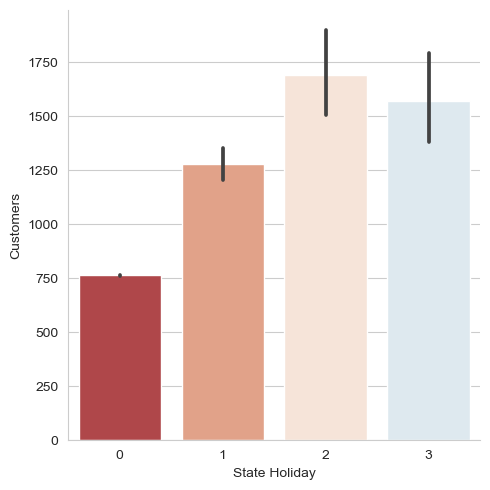

In [175]:
g=sns.catplot(x="SH",y="Customers",kind="bar",data=data)
g.set(xlabel="State Holiday")
plt.show()

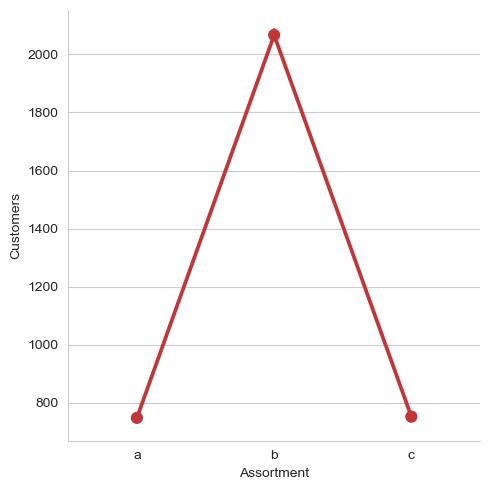

In [182]:
sns.catplot(x="Assortment",y="Customers",data=data,kind="point",order=['a','b','c'])
plt.show()

In [180]:
data.groupby("Assortment")["Sales"].mean()

Assortment
a    6621.017039
b    8639.346322
c    7300.526339
Name: Sales, dtype: float64